In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from joblib import dump, load
from langdetect import detect
import chardet
from unidecode import unidecode
from googletrans import Translator

In [11]:
pip install langdetect

     |████████████████████████████████| 981 kB 3.1 MB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=8fc43def4514b4bc99aa817dc42d9b25f7318f6a11bc1ab72c6b43f80496868b
  Stored in directory: /Users/DaniU/Library/Caches/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [87]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [176]:
pip install unidecode

     |████████████████████████████████| 235 kB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [107]:
pip install googletrans==4.0.0-rc1

     |████████████████████████████████| 55 kB 5.7 MB/s eta 0:00:011
     |████████████████████████████████| 1.5 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.6 MB/s eta 0:00:01
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
     |████████████████████████████████| 65 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 548 kB/s eta 0:00:011
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=fb4b448bdd40c9deb245848f794bce7496d815c46c1dcf1c4fe89a0d5f7eb06a
  Stored in directory: /Users/DaniU/Library/Caches/pip/wheels/a9/25/af/715361fa79594524c89c75d293def652045f3fdce6ca398712
Successfully built googletrans
Note: you may need to restart the kernel to use updated packages.


# 1.Entendimiento de los datos

# 1.1 Carga de datos

In [6]:
plt.figure(figsize=(6, 6))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
df_train = pd.read_csv('cat_345.csv', encoding = "utf-8", sep=';')

df_train.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3


<Figure size 432x432 with 0 Axes>

# 1.2 Verificación de tipos

In [7]:
df_train.dtypes

Textos_espanol    object
sdg                int64
dtype: object

In [8]:
df_train.columns

Index(['Textos_espanol', 'sdg'], dtype='object')

In [9]:
(df_train.isnull().sum() / df_train.shape[0]).sort_values(ascending = False)

sdg               0.0
Textos_espanol    0.0
dtype: float64

# 1.3 Análisis datos numéricos

# 1.4 Análisis datos categóricos

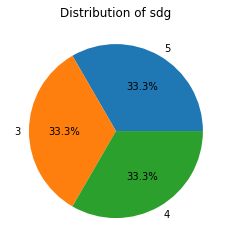

In [10]:
df_train['sdg'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of sdg')
plt.ylabel('')
plt.show()

In [11]:
df_train['sdg'].describe()

count    3000.000000
mean        4.000000
std         0.816633
min         3.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: sdg, dtype: float64

In [12]:
unique_categories = df_train['sdg'].unique()
unique_categories.shape[0]

3

# Idioma

In [13]:
df_train["idioma"]= df_train['Textos_espanol'].apply(detect)
idiomas= df_train["idioma"].value_counts(normalize=True)
print(idiomas)

es    0.997333
en    0.002000
fr    0.000667
Name: idioma, dtype: float64


In [15]:
df_train['Textos_espanol'] = df_train['Textos_espanol'].astype(str)
df_train['Textos_espanol'] = df_train['Textos_espanol'].apply(lambda x: unidecode(x).encode('latin1').decode('latin1'))

In [16]:
df_train

,Textos_espanol,sdg,idioma
0,"Por ejemplo, el nAomero de consultas externas ...",3,es
1,"En 2007, el gobierno central financio directam...",3,es
2,"Claramente, hay muchos otros factores en juego...",3,es
3,"Por ejemplo, el estado australiano de Victoria...",3,es
4,"El consumo anual de alcohol se estima en 15,7 ...",3,es
...,...,...,...
2995,Un caucus efectivo se basa en fuertes vinculos...,5,es
2996,"Por el contrario, el porcentaje de hogares en ...",5,es
2997,El analisis utilizara una gama de medidas que ...,5,es
2998,"La capacitacion economica, el apoyo y, a veces...",5,es


In [49]:
df_train.to_csv('entendimiento.csv', index=False)

# 1.5 Conclusiones de entendimiento

# 2. Preparación de los datos

# 2.1 Arreglo de tipos

In [17]:
df_train["Textos_espanol"] = df_train["Textos_espanol"].astype(str)

# 3. Modelo

# 3.1 Particionamiento

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_train[["Textos_espanol"]], df_train["sdg"], test_size=0.3, stratify=df_train["sdg"], random_state=1)

In [19]:
X_train.shape, X_test.shape

((2100, 1), (900, 1))

In [20]:
pd.Series(y_train).value_counts(normalize=True)

5    0.333333
3    0.333333
4    0.333333
Name: sdg, dtype: float64

In [21]:
pd.Series(y_test).value_counts(normalize=True)

5    0.333333
4    0.333333
3    0.333333
Name: sdg, dtype: float64

# 3.2 Text vectorization

# 3.2.1 Stop words

In [22]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("stopwords-es")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to /Users/DaniU/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/DaniU/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading stopwords-es: Package 'stopwords-es' not
[nltk_data]     found in index


In [23]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

# 3.2.2 Bow

In [24]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [25]:
X_bow = bow.fit_transform(X_train["Textos_espanol"])

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [26]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 15439


# 3.2.3 TF-IDF

In [27]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [28]:
X_tfidf = tfidf.fit_transform(X_train["Textos_espanol"])

In [29]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 15439


# 3.3 Algoritmo 1: BoW

In [138]:
bow_model = RandomForestClassifier(random_state=2)

In [139]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<AxesSubplot:>

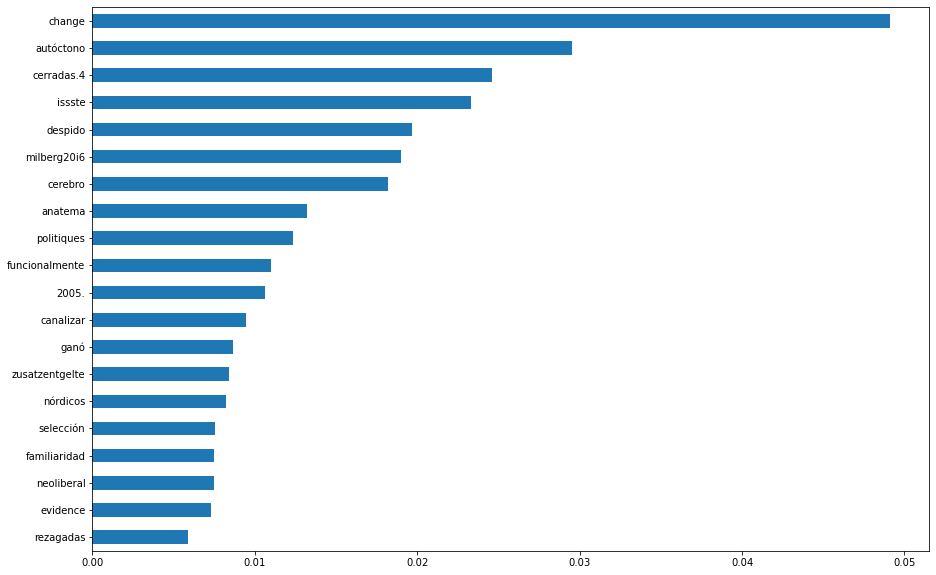

In [140]:
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [141]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 100.39


In [142]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test["Textos_espanol"]))

# 3.3.1 Análisis

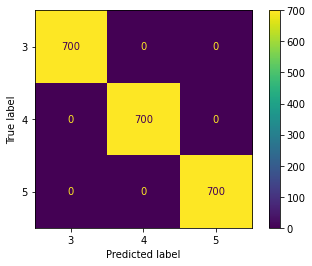

In [143]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

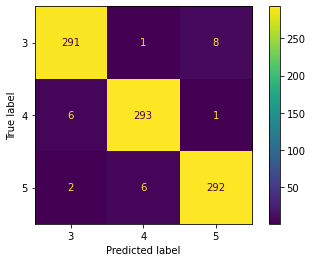

In [144]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [145]:
print("Precision:", precision_score(y_train, y_train_bow_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_bow_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_bow_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [146]:
print("Precision:", precision_score(y_test, y_test_bow_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_bow_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_bow_predict, average='micro'))

Precision: 0.9733333333333334
Recall: 0.9733333333333334
F1: 0.9733333333333334


# 3.4 Algoritmo 2: TF-IDF

In [147]:
tfidf_model = RandomForestClassifier(random_state=3)

In [148]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<AxesSubplot:>

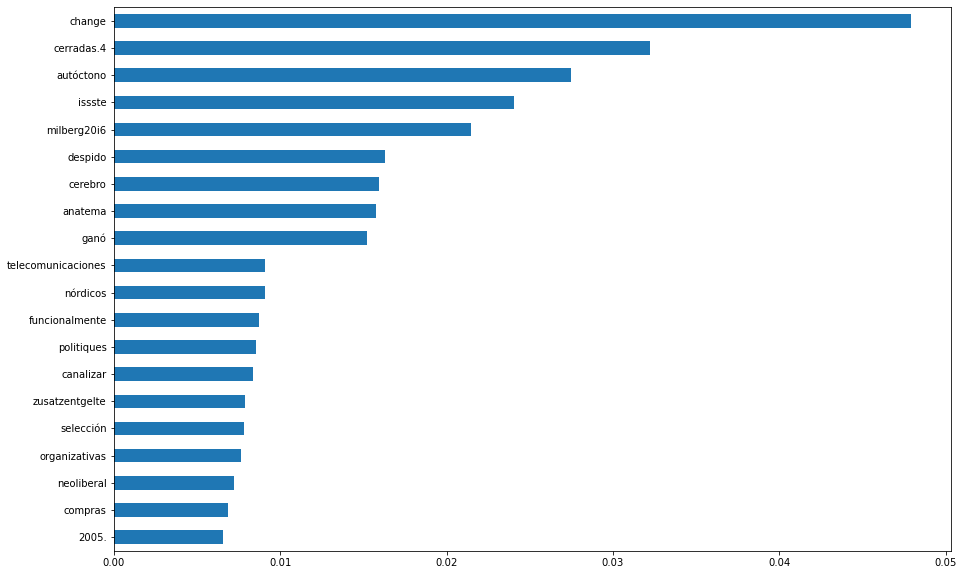

In [149]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [150]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 96.69


In [151]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test["Textos_espanol"]))

# 3.4.1 Análisis

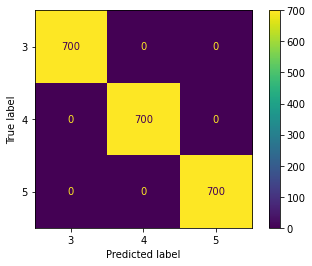

In [152]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

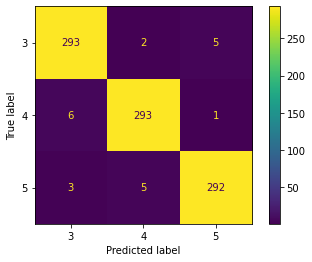

In [153]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [154]:
print("Precision:", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_tfidf_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [155]:
print("Precision:", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision: 0.9755555555555555
Recall: 0.9755555555555555
F1: 0.9755555555555555


# 3.5 Algoritmo 3: RandomForest + RandomizedCV

In [158]:
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4))
])

In [159]:
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100]
}

In [160]:
search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, scoring=["precision", "recall", "f1"], refit="f1", cv=10, return_train_score=True, verbose=1, random_state=5)


In [161]:
search.fit(X_train["Textos_espanol"], y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('vectorizer',
                                              CountVectorizer(stop_words=['de',
                                                                          'la',
                                                                          'que',
                                                                          'el',
                                                                          'en',
                                                                          'y',
                                                                          'a',
                                                                          'los',
                                                                          'del',
                                                                          'se',
                                                                          'las',
                                                                          'por',
                                                                          'un',
                                                                          'para',
                                                                          'con',
                                                                          'no',
                                                                          'una',
                                                                          'su',
                                                                          'al',
                                                                          'lo',
                                                                          'como',
                                                                          'más',
                                                                          'pero',
                                                                          'sus',
                                                                          'le',
                                                                          'ya',
                                                                          'o',
                                                                          'este',
                                                                          'sí',
                                                                          'porque', ...],
                                                              tokenizer=<function word_tokenize at 0x7fa7d8b3b550>)),
                                             ('classifier',
                                              RandomForestClassi...
                                                                                   'la',
                                                                                   'que',
                                                                                   'el',
                                                                                   'en',
                                                                                   'y',
                                                                                   'a',
                                                                                   'los',
                                                                                   'del',
                                                                                   'se',
                                                                                   'las',
                                                                                   'por',
                                                                                   'un',
                                                                                   'para',
                                                                                  

In [162]:
search.best_params_

{'vectorizer__lowercase': False,
 'vectorizer': CountVectorizer(lowercase=False,
                 stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 tokenizer=<function word_tokenize at 0x7fa7d8b3b550>),
 'classifier__n_estimators': 100,
 'classifier__max_depth': 100,
 'classifier__criterion': 'gini'}

In [163]:
y_train_search_predict = search.best_estimator_.predict(X_train["Textos_espanol"])
y_test_search_predict = search.best_estimator_.predict(X_test["Textos_espanol"])

In [48]:
pd.Series(pipeline.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))


AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

# 3.5.1 Análisis

In [164]:
print("Precision:", precision_score(y_train, y_train_search_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_search_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_search_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [165]:
print("Precision:", precision_score(y_test, y_test_search_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_search_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_search_predict, average='micro'))

Precision: 0.9777777777777777
Recall: 0.9777777777777777
F1: 0.9777777777777777


#  4. CSV con predicciones

In [30]:
plt.figure(figsize=(6, 6))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
df = pd.read_csv('SinEtiquetatest_cat_345.csv', encoding='utf-8', sep=';')
df.head()

,Textos_espanol,sdg
0,Se basa en los nueve años de educación básica ...,NaN
1,"En la última década, y en particular desde 201...",NaN
2,"AsÃ, por ejemplo, el estigma asociado a los be...",NaN
3,Hay muchos profesores no cualificados en las e...,NaN
4,A raíz de su preocupación por el hecho de que ...,NaN


<Figure size 432x432 with 0 Axes>

In [31]:
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100]
}

In [32]:
df_train['Textos_espanol'] = df_train['Textos_espanol'].astype(str)
df_train['Textos_espanol'] = df_train['Textos_espanol'].apply(lambda x: unidecode(x).encode('latin1').decode('latin1'))

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

plt.figure(figsize=(6, 6))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
df_train = pd.read_csv('cat_345.csv', encoding = "utf-8", sep=';')

features=["Textos_espanol"]

class TextTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(lambda x: unidecode(x).encode('latin1').decode('latin1'))

pipeline = Pipeline([
    #('transformer', TextTransformer()),
    ("vectorizer", TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ('classifier', RandomForestClassifier(random_state=4))
])

search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, scoring=["precision", "recall", "f1"], refit="f1", cv=10, return_train_score=True, verbose=1, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(df_train["Textos_espanol"], df_train["sdg"], test_size=0.3, stratify=df_train["sdg"], random_state=1)
pipe = search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/DaniU/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_v

<Figure size 432x432 with 0 Axes>

In [41]:
filename = 'model.joblib'

In [42]:
dump(pipe, filename)

['model.joblib']

In [43]:
pipeline_loaded = load(filename)

In [44]:
df["sdg"] = pipeline_loaded.predict(df["Textos_espanol"])

In [45]:
df.head()

,Textos_espanol,sdg
0,Se basa en los nueve años de educación básica ...,4
1,"En la última década, y en particular desde 201...",3
2,"AsÃ, por ejemplo, el estigma asociado a los be...",5
3,Hay muchos profesores no cualificados en las e...,4
4,A raíz de su preocupación por el hecho de que ...,3


In [46]:
df.to_csv('output_file.csv', index=False)